In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler

# reading
#read text file into a Dataframe
df = pd.read_csv("housing_prices.csv").copy()

In [2]:
#data.columns
df['MSZoning'].apply(str)

0       RL
1       RL
2       RL
3       RL
4       RL
        ..
1455    RL
1456    RL
1457    RL
1458    RL
1459    RL
Name: MSZoning, Length: 1460, dtype: object

In [3]:
#df['MSZoning'].value_counts()

## Train - test split

In [4]:
X = df.drop(columns=['SalePrice'])
y = df['SalePrice']

In [5]:
#Data_Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=123000)
#X_train

Pipelines can contain many different steps inside. I would divide them into 2 groups: Preprocessing pipelines and Modelling pipelines. A Modelling pipeline has a model as their last step, whereas a preprocessing pipeline doesn't.

Preprocessing pipelines: Those pipelines only transform the predictor features (the X) by filling NAs, encoding categorical features, scaling, etc. You always have to fit them with X_train. Then, you can call the .transform() method to transform both the X_train and the X_test. (Sometimes, you fit and transform X_train in a single step, by using the .fit_transform() method, but you're still performing these 2 separate steps). Any time that you call transform() you get as an output the transformed data, X_train or X_test.

### Creating the "numeric pipe and categorical pipe" 

In [7]:
# import
from sklearn.preprocessing import OneHotEncoder
# select categorical and numerical column names
X_cat_columns = X.select_dtypes(exclude="number").copy().columns
X_num_columns = X.select_dtypes(include="number").copy().columns

# create numerical pipeline, only with the SimpleImputer(strategy="median" and data scaling)
scaler = StandardScaler(with_mean=False)
numeric_pipe = make_pipeline(scaler,SimpleImputer(strategy="median"))
 
 # create categorical pipeline, with the SimpleImputer(fill_value="N_A") and the OneHotEncoder
categoric_pipe = make_pipeline(
    SimpleImputer(strategy="most_frequent"),   #"most_frequent"
    OneHotEncoder(handle_unknown='ignore', sparse = False) 
)

### Using ColumnTransformer a pipeline with 2 branches (the preprocessor)
##### We simply tell the pipeline the following:

##### One branch, called "num_pipe", will apply the steps in the numeric_pipe to the columns named in X_num_columns
##### The second branch, called "cat_pipe", will apply the steps in the categoric_pipe to the columns named in X_cat_columns

In [8]:
from sklearn.compose import ColumnTransformer  #make_column_Transformer then dont need to mention names

preprocessor = ColumnTransformer(
    transformers=[
        ("num_pipe", numeric_pipe , X_num_columns),
        ("cat_pipe", categoric_pipe, X_cat_columns),
    ]
)

preprocessor

ColumnTransformer(transformers=[('num_pipe',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler(with_mean=False)),
                                                 ('simpleimputer',
                                                  SimpleImputer(strategy='median'))]),
                                 Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFl...
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object'))])

In [9]:
full_pipeline = make_pipeline(preprocessor)

In [10]:
full_pipeline.fit(X_train, y_train) #training the machine

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler(with_mean=False)),
                                                                  ('simpleimputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtU...
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object'))]))])

In [12]:
X_train_cleaned = full_pipeline.transform(X_train)
X_train_cleaned

array([[0.17622227, 0.46331707, 3.40783151, ..., 0.        , 1.        ,
        0.        ],
       [1.09781713, 1.38995121, 3.00691016, ..., 0.        , 0.        ,
        1.        ],
       [1.15020754, 1.62160974, 2.00460677, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [3.40299498, 0.6949756 , 2.40552812, ..., 0.        , 0.        ,
        0.        ],
       [2.49092565, 0.46331707, 2.76635734, ..., 0.        , 1.        ,
        0.        ],
       [1.57885631, 0.46331707, 4.81105625, ..., 0.        , 1.        ,
        0.        ]])

In [13]:
X_test_cleaned = full_pipeline.transform(X_test)
X_test_cleaned

array([[3.33155352, 1.15829267, 2.40552812, ..., 0.        , 1.        ,
        0.        ],
       [2.27660126, 2.08492681, 3.2875551 , ..., 0.        , 1.        ,
        0.        ],
       [1.14544478, 0.46331707, 3.92902927, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [2.9219558 , 1.38995121, 3.44792365, ..., 0.        , 1.        ,
        0.        ],
       [3.31012108, 1.15829267, 2.40552812, ..., 0.        , 1.        ,
        0.        ],
       [3.11484775, 0.46331707, 2.40552812, ..., 0.        , 1.        ,
        0.        ]])

## Creating dataframes from cleaned data (needed later during scaling)

In [20]:
X_train_cleaned_df = pd.DataFrame(X_train_cleaned)
X_train_cleaned_df

,0,1,2,3,4,5,6,7,8,9,...,274,275,276,277,278,279,280,281,282,283
0,0.176222,0.463317,3.407832,1.017570,3.659872,6.316893,65.233711,97.926322,0.572705,0.688860,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.097817,1.389951,3.006910,0.798493,5.855795,4.512067,67.069870,98.219661,0.605746,1.171062,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.150208,1.621610,2.004607,0.249404,5.123821,7.219306,63.931708,98.024101,0.000000,0.643654,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.271478,0.463317,2.766357,2.094997,4.391847,4.512067,65.200326,95.481830,1.013247,0.075344,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.261952,0.463317,4.209674,1.172300,4.391847,5.414480,66.001559,96.655186,2.643254,1.517645,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,1.736028,2.084927,3.407832,1.144766,3.659872,4.512067,65.367250,95.726279,0.523144,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1164,2.786217,1.389951,4.730872,3.567480,7.319744,4.512067,66.602484,97.584093,7.588341,2.985778,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1165,3.402995,0.694976,2.405528,0.718285,3.659872,6.316893,64.766325,97.388534,1.618993,1.097871,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1166,2.490926,0.463317,2.766357,1.364741,2.195923,4.512067,65.267096,95.579610,0.000000,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [21]:
X_test_cleaned_df = pd.DataFrame(X_test_cleaned)
X_test_cleaned_df

,0,1,2,3,4,5,6,7,8,9,...,274,275,276,277,278,279,280,281,282,283
0,3.331554,1.158293,2.405528,0.718285,3.659872,3.609653,65.100172,96.899635,0.000000,0.387484,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2.276601,2.084927,3.287555,0.711900,4.391847,5.414480,64.966633,95.335161,2.329367,1.041901,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.145445,0.463317,3.929029,1.599480,6.587770,4.512067,66.902946,98.024101,2.081562,2.714539,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2.593325,3.706537,0.962211,0.251599,5.123821,4.512067,66.902946,97.975211,0.275339,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.543136,0.463317,3.407832,1.042710,4.391847,4.512067,65.200326,95.481830,1.189464,1.076344,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,2.738589,1.621610,2.004607,0.897856,5.123821,8.121720,64.098631,97.192974,0.000000,1.343277,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
288,0.952553,1.389951,2.605989,0.810564,5.123821,4.512067,66.969716,98.121881,0.550678,1.747983,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
289,2.921956,1.389951,3.447924,1.456322,4.391847,4.512067,67.003100,98.121881,0.407502,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
290,3.310121,1.158293,2.405528,0.598571,4.391847,5.414480,64.799710,95.335161,0.000000,0.807258,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


## Quick baseline models (baseline for performance)

In [22]:
# Decision tree
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor() # initialize
tree.fit(X_train_cleaned, y_train)


# K Nearest neighbors
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=1) # initialize with parameters
neigh.fit(X_train_cleaned, y_train) # fit to train set 

KNeighborsRegressor(n_neighbors=1)

## Performance on the test set

Let's check the R Squared of the model

In [23]:
from sklearn.metrics import r2_score

tree_pred = tree.predict(X = X_test_cleaned) # Decision tree
knn_pred = neigh.predict(X = X_test_cleaned) # K Nearest neighbors


performances = {}

performances["baseline_tree"]= r2_score(y_test, tree_pred)
performances["baseline_knn"] = r2_score(y_test, knn_pred)

performances


{'baseline_tree': 0.8041866577445695, 'baseline_knn': 0.7574936032058011}

Modelling pipelines: When the last step of the pipeline is a model (e.g. a decision tree), you will do the whole process in fewer steps. Specifically, you will never be creating the X_train_preprocessed and the X_test_preprocessed from our previous examples. When you fit such a pipeline, you are fitting your transformers (scaler, imputer...), preprocessing your data (transforming it), passing the transformed data directly to the model and fitting the model all at once. Here the steps would be:
Create your modelling pipeline, let's call it modelling_pipe
Fit it to the train set: modelling_pipe.fit(X_train)
Use the pipeline directly to make predictions. This pipeline can take "raw" data as input and give you predictions as the output, since it contains all preprocessing and modelling steps inside: test_pred = modelling_pipe.predict(X_test)

#### You can already see how a Decision Tree handles a noisy dataset much better than a knn. In a Decision Tree, only the "best" features take part of the algorithm, 
whereas in a KNN all features matter the same. It does not mean that the Decision Tree will always be the better algorithm: 
after preprocessing, it's possible that the KNN works better.


## Variance Threshold
This is the first feature selection method we will use. It's extremely simple.

Features with a low variance have a low amount of information. With this transformer we can drop the features with the lowest variance. We will set a threshold and all features with a variance below that number will be dropped.

Notice first that the variance of a column also depends on its scale. In our dataset, most of the columns have a really small range, except for some features:

In [24]:
X.describe().loc[["min", "max"]].T

,min,max
Id,1.0,1460.0
MSSubClass,20.0,190.0
LotFrontage,21.0,313.0
LotArea,1300.0,215245.0
OverallQual,1.0,10.0
OverallCond,1.0,9.0
YearBuilt,1872.0,2010.0
YearRemodAdd,1950.0,2010.0
MasVnrArea,0.0,1600.0
BsmtFinSF1,0.0,5644.0


In [25]:
X.var().sort_values()

C:\Users\shrut\AppData\Local\Temp/ipykernel_15304/2532725990.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  X.var().sort_values()


KitchenAbvGr     4.854892e-02
BsmtHalfBath     5.700283e-02
HalfBath         2.528937e-01
BsmtFullBath     2.692682e-01
FullBath         3.035082e-01
Fireplaces       4.155947e-01
GarageCars       5.584797e-01
BedroomAbvGr     6.654938e-01
OverallCond      1.238322e+00
YrSold           1.763837e+00
OverallQual      1.912679e+00
TotRmsAbvGrd     2.641903e+00
MoSold           7.309595e+00
YearRemodAdd     4.262328e+02
LotFrontage      5.897492e+02
GarageYrBlt      6.095825e+02
3SsnPorch        8.595059e+02
YearBuilt        9.122154e+02
PoolArea         1.614216e+03
MSSubClass       1.789338e+03
LowQualFinSF     2.364204e+03
ScreenPorch      3.108889e+03
EnclosedPorch    3.735550e+03
OpenPorchSF      4.389861e+03
WoodDeckSF       1.570981e+04
BsmtFinSF2       2.602391e+04
MasVnrArea       3.278497e+04
GarageArea       4.571251e+04
1stFlrSF         1.494501e+05
Id               1.777550e+05
2ndFlrSF         1.905571e+05
TotalBsmtSF      1.924624e+05
BsmtUnfSF        1.952464e+05
BsmtFinSF1

...and that shows when we look at the variance of the features (look at the bottom of the list, the features with the most variance):

## Data Scaling
Therefore, it's a good idea to scale the features before removing those with a smaller variance. Some scaling processes (e.g. standardization) transform features in such a way that they all end up having the same variance.
It's important to pick a scaler that does not do that. We will use min-max scaling:

In [26]:
from sklearn.preprocessing import MinMaxScaler

my_scaler = MinMaxScaler()

X_train_scaled = my_scaler.fit_transform(X_train_cleaned_df)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_cleaned_df.columns)
X_train_scaled

,0,1,2,3,4,5,6,7,8,9,...,274,275,276,277,278,279,280,281,282,283
0,0.050034,0.000000,0.219178,0.040806,0.444444,0.750,0.594203,0.883333,0.065000,0.056697,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.315284,0.235294,0.184932,0.030533,0.777778,0.500,0.992754,0.983333,0.068750,0.096386,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.330363,0.294118,0.099315,0.004786,0.666667,0.875,0.311594,0.916667,0.000000,0.052977,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.077450,0.000000,0.164384,0.091328,0.555556,0.500,0.586957,0.050000,0.115000,0.006201,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.074709,0.000000,0.287671,0.048061,0.555556,0.625,0.760870,0.450000,0.300000,0.124911,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,0.498972,0.411765,0.219178,0.046770,0.444444,0.500,0.623188,0.133333,0.059375,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1164,0.801234,0.235294,0.332192,0.160375,1.000000,0.500,0.891304,0.766667,0.861250,0.245748,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1165,0.978753,0.058824,0.133562,0.026772,0.444444,0.750,0.492754,0.700000,0.183750,0.090361,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1166,0.716244,0.000000,0.164384,0.057085,0.222222,0.500,0.601449,0.083333,0.000000,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [27]:
X_train_scaled.var().sort_values().to_list()

[0.0008561643835615958,
 0.0008561643835615996,
 0.0008561643835616019,
 0.0008561643835616141,
 0.0008561643835616141,
 0.0008561643835616157,
 0.0008561643835616162,
 0.0008561643835616165,
 0.0008561643835616183,
 0.0008561643835616186,
 0.0008561643835616199,
 0.0008561643835616241,
 0.0008561643835616263,
 0.0008561643835616276,
 0.0008561643835616316,
 0.0008561643835616318,
 0.0008561643835616347,
 0.0008561643835616377,
 0.0008561643835616377,
 0.0008561643835616385,
 0.000856164383561639,
 0.0008561643835616431,
 0.0010042262355785393,
 0.0017108614759775108,
 0.0017108614759775121,
 0.0017108614759775128,
 0.0017108614759775138,
 0.0017108614759775143,
 0.001710861475977515,
 0.0017108614759775152,
 0.0017108614759775156,
 0.0017108614759775156,
 0.0017108614759775158,
 0.0017108614759775158,
 0.001710861475977516,
 0.001710861475977516,
 0.0017108614759775169,
 0.001710861475977517,
 0.001710861475977518,
 0.0017108614759775182,
 0.0022006880129144275,
 0.002564091277247566,

### As you can see, after scaling, We can now apply the VarianceThreshold transformation:

In [28]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.0009)
train_X_prep = selector.fit_transform(X_train_scaled)

### Let's check how many features were dropped:

In [29]:
print("shape before:", X_train_scaled.shape)
print("shape after:", train_X_prep.shape)

shape before: (1168, 284)
shape after: (1168, 262)


### **Note:** In general, it's not recommended to drop many features with this transformer, as a feature could have a small amount of information, but this information could be VERY important for whatever we're predicting. For example: A feature in the Housing dataset with the amount of "Private Helicopters" would have a small variance since we expect almost all houses to have `0` Helicopters. But if a house has one, it may bring the price up substantially, and therefore it could still be important to preserve thisinformation. When in doubt, drop only features with zero variance: those have really zero information, and dropping them will always be the right approach.

### Recovering feature names after dropping low variance features:

In [30]:
colnames = X_train_cleaned_df.columns[selector.get_support(indices=True)]
train_X_prep = pd.DataFrame(train_X_prep, columns=colnames)
train_X_prep.head(3)

,0,1,2,3,4,5,6,7,8,9,...,274,275,276,277,278,279,280,281,282,283
0,0.050034,0.000000,0.219178,0.040806,0.444444,0.750,0.594203,0.883333,0.06500,0.056697,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.315284,0.235294,0.184932,0.030533,0.777778,0.500,0.992754,0.983333,0.06875,0.096386,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.330363,0.294118,0.099315,0.004786,0.666667,0.875,0.311594,0.916667,0.00000,0.052977,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


### Transforming the test set, always remember to use the `transform` method and not the `fit_transorm`, which we reserve for the train set:

In [31]:
test_set_X_scaled = my_scaler.transform(X_test_cleaned_df) # X_test_cleaned_df
test_set_X_prep = selector.transform(test_set_X_scaled)

### Let's check how does our model do with the new dataset:

In [32]:
# Decision tree
tree = DecisionTreeRegressor() # initialize
tree.fit(train_X_prep, y_train)
tree_pred = tree.predict(X = test_set_X_prep)

# K Nearest neighbors
neigh = KNeighborsRegressor(n_neighbors=1) # initialize with parameters
neigh.fit(train_X_prep, y_train) # fit to train set
knn_pred = neigh.predict(X = test_set_X_prep)


performances["varThreshold_tree"]= r2_score(y_test, tree_pred)
performances["varThreshold_knn"] = r2_score(y_test, knn_pred)

performances

{'baseline_tree': 0.8041866577445695,
 'baseline_knn': 0.7574936032058011,
 'varThreshold_tree': 0.7756227402084864,
 'varThreshold_knn': 0.5948525399895614}

### Variance scaling: 2nd iteration

It looks like we might have removed features that were important, since the performance of our algorithms dropped. It can happen using a simple method like Variance Threshold.
Let's use more conservative parameters now:

In [33]:
selector2 = VarianceThreshold(threshold=0)
train_X_prep = selector2.fit_transform(X_train_scaled)

print("shape before:", X_train_scaled.shape)
print("shape after:", train_X_prep.shape)

shape before: (1168, 284)
shape after: (1168, 284)


### We have only dropped 2 features that had ZERO variance. The performance of the models now should be, at the very least, the same:

In [34]:
test_set_X_prep2 = selector2.transform(test_set_X_scaled)

### Remember to always transform your test set the same way you transformed your train set:

In [35]:
# Decision tree
tree = DecisionTreeRegressor() # initialize
tree.fit(train_X_prep, y_train)
tree_pred = tree.predict(X = test_set_X_prep2)

# K Nearest neighbors
neigh = KNeighborsRegressor(n_neighbors=1) # initialize with parameters
neigh.fit(train_X_prep, y_train) # fit to train set
knn_pred = neigh.predict(X = test_set_X_prep2)


performances["varThreshold_2_tree"]= r2_score(y_test, tree_pred)
performances["varThreshold_2_knn"] = r2_score(y_test, knn_pred)

performances

{'baseline_tree': 0.8041866577445695,
 'baseline_knn': 0.7574936032058011,
 'varThreshold_tree': 0.7756227402084864,
 'varThreshold_knn': 0.5948525399895614,
 'varThreshold_2_tree': 0.8008285826002568,
 'varThreshold_2_knn': 0.596275697116528}

## Collinearity

Features that have a perfect (or extremely high) correlation with each other can be considered the same feature. We want to drop one of them. Let's first explore the pairwise correlations between all features.

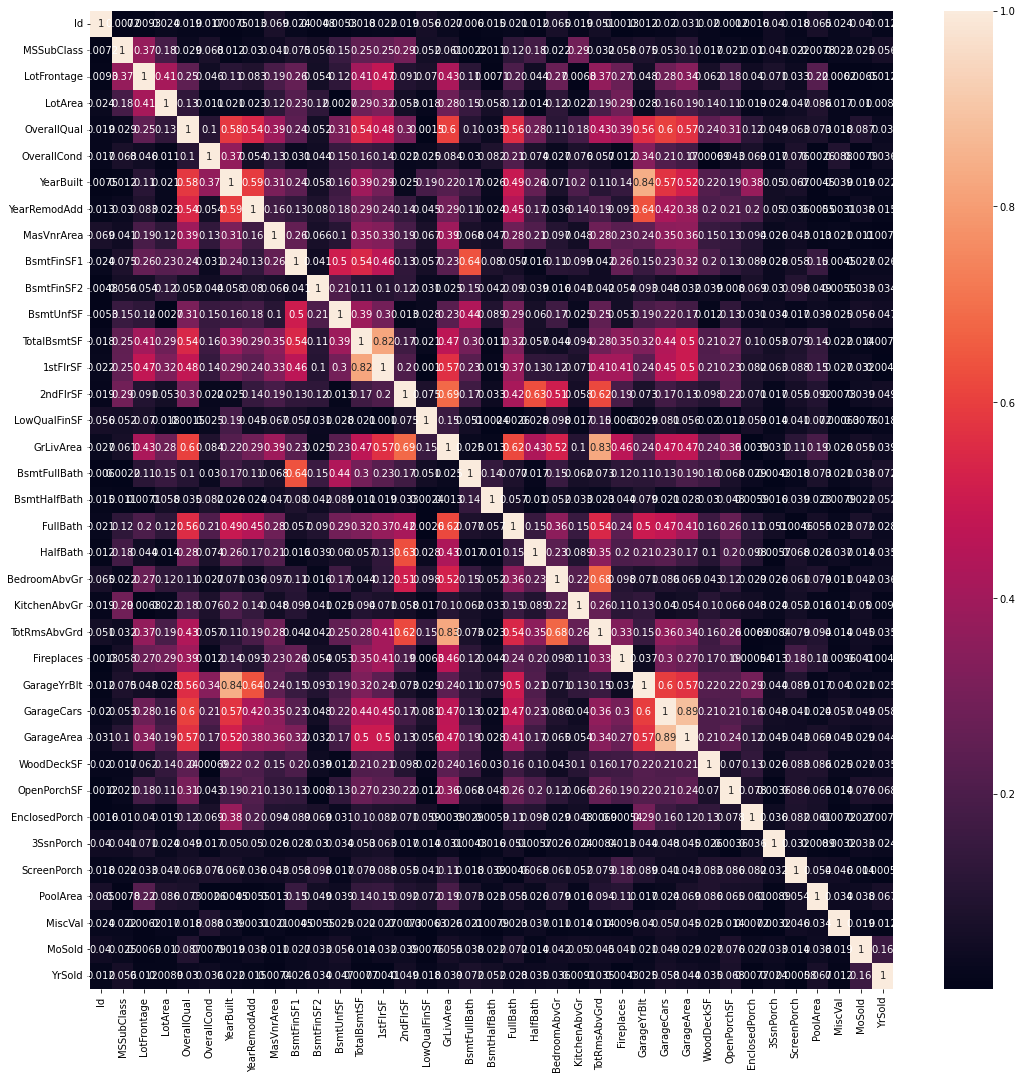

In [36]:
import seaborn as sn
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(18,18))
corrMatrix = X_train.corr().abs()
sn.heatmap(corrMatrix, annot=True);

In [37]:
# Select upper triangle of correlation matrix
upper = corrMatrix.where(np.triu(np.ones(corrMatrix.shape), k=1).astype(bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
to_drop

[]

In [38]:
# drop cols train set
X_train_selected = X_train.drop(columns=to_drop, )

# drop cols test set
X_test_selected = X_test.drop(columns=to_drop)

In [39]:
# Decision tree
tree = DecisionTreeRegressor() # initialize
tree.fit(X_train_cleaned, y_train)
tree_pred = tree.predict(X = X_test_cleaned)

# K Nearest neighbors
neigh = KNeighborsRegressor(n_neighbors=1) # initialize with parameters
neigh.fit(X_train_cleaned, y_train) # fit to train set
knn_pred = neigh.predict(X = X_test_cleaned)

performances["collinearity_tree"]= r2_score(y_test, tree_pred)
performances["collinearity_knn"] = r2_score(y_test, knn_pred)

performances

{'baseline_tree': 0.8041866577445695,
 'baseline_knn': 0.7574936032058011,
 'varThreshold_tree': 0.7756227402084864,
 'varThreshold_knn': 0.5948525399895614,
 'varThreshold_2_tree': 0.8008285826002568,
 'varThreshold_2_knn': 0.596275697116528,
 'collinearity_tree': 0.7695936968401312,
 'collinearity_knn': 0.7574936032058011}

### Select K Best

### Use statistical tests such as ANOVA or chi2 to rank features, and keep the selected best ones.

In [40]:
from sklearn.feature_selection import SelectKBest, f_regression
KBest = SelectKBest(score_func=f_regression, k=100)

In [41]:
# transform train set
train_X_KBest = KBest.fit_transform(X_train_cleaned, y_train)

# transform test set
test_X_KBest = KBest.transform(X_test_cleaned)

In [42]:
train_X_KBest.shape

(1168, 100)

In [43]:
# Decision tree
tree = DecisionTreeRegressor() # initialize
tree.fit(train_X_KBest, y_train)
tree_pred = tree.predict(X = test_X_KBest)

# K Nearest neighbors
neigh = KNeighborsRegressor(n_neighbors=1) # initialize with parameters
neigh.fit(train_X_KBest, y_train) # fit to train set
knn_pred = neigh.predict(X = test_X_KBest)

performances["KBest_tree"]= r2_score(y_test, tree_pred)
performances["KBest_knn"] = r2_score(y_test, knn_pred)

performances

{'baseline_tree': 0.8041866577445695,
 'baseline_knn': 0.7574936032058011,
 'varThreshold_tree': 0.7756227402084864,
 'varThreshold_knn': 0.5948525399895614,
 'varThreshold_2_tree': 0.8008285826002568,
 'varThreshold_2_knn': 0.596275697116528,
 'collinearity_tree': 0.7695936968401312,
 'collinearity_knn': 0.7574936032058011,
 'KBest_tree': 0.7962380886768176,
 'KBest_knn': 0.7452617886754523}

## 7. RFE
Train a model with all the features, then start dropping features and keep iterating until performance drops.

In [44]:
from sklearn.feature_selection import RFECV

In [45]:
RFE_selector_tree = RFECV(DecisionTreeRegressor())

In [46]:
#"RFE_selector_tree__DecisionTreeRegressor__depth" = [1,2,3,4,5,6]

In [47]:
# Decision tree
RFE_selector_tree.fit(X_train_cleaned, y_train) # train_X_KBest
tree_pred = RFE_selector_tree.predict(X =X_test_cleaned ) # test_X_KBest

performances["RFE_tree"]= r2_score(y_test, tree_pred)

performances

{'baseline_tree': 0.8041866577445695,
 'baseline_knn': 0.7574936032058011,
 'varThreshold_tree': 0.7756227402084864,
 'varThreshold_knn': 0.5948525399895614,
 'varThreshold_2_tree': 0.8008285826002568,
 'varThreshold_2_knn': 0.596275697116528,
 'collinearity_tree': 0.7695936968401312,
 'collinearity_knn': 0.7574936032058011,
 'KBest_tree': 0.7962380886768176,
 'KBest_knn': 0.7452617886754523,
 'RFE_tree': 0.8121374045809016}

 ### Select from model

In [48]:
from sklearn.feature_selection import SelectFromModel

select_model_tree = SelectFromModel(DecisionTreeRegressor(), threshold=None)

train_X_selected_model_tree = select_model_tree.fit_transform(X_train_cleaned, y_train)

test_X_selected_model_tree = select_model_tree.transform(X_test_cleaned)


In [49]:
train_X_selected_model_tree.shape

(1168, 21)

In [50]:
# Decision tree
tree = DecisionTreeRegressor() # initialize
tree.fit(train_X_selected_model_tree, y_train)
tree_pred = tree.predict(X = test_X_selected_model_tree)

# K Nearest neighbors
neigh = KNeighborsRegressor(n_neighbors=1) # initialize with parameters
neigh.fit(train_X_selected_model_tree, y_train) # fit to train set
knn_pred = neigh.predict(X = test_X_selected_model_tree)

performances["model_selected_tree"]= r2_score(y_test, tree_pred)
performances["model_selected_knn"] = r2_score(y_test, knn_pred)

performances

{'baseline_tree': 0.8041866577445695,
 'baseline_knn': 0.7574936032058011,
 'varThreshold_tree': 0.7756227402084864,
 'varThreshold_knn': 0.5948525399895614,
 'varThreshold_2_tree': 0.8008285826002568,
 'varThreshold_2_knn': 0.596275697116528,
 'collinearity_tree': 0.7695936968401312,
 'collinearity_knn': 0.7574936032058011,
 'KBest_tree': 0.7962380886768176,
 'KBest_knn': 0.7452617886754523,
 'RFE_tree': 0.8121374045809016,
 'model_selected_tree': 0.7592277195566607,
 'model_selected_knn': 0.6572805730834639}